<a href="https://colab.research.google.com/github/GuiBichaco/developmentOfPandasLibraries/blob/main/Pandas_LAB_Cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.fiap.com.br/">
    <img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">
    
</a>
<h6>DEVELOPED BY: Guilherme Catelli Bichaco / RM: 97989</h6>

# DATA SCIENCE & STATISTICAL COMPUTING

## Dataframe & Python

### LAP Parte 2: “Cookbook"

#### *BASED ON THE DOCUMENTATION BELOW*
https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Bem-vindo ao Cookbook do pandas!")


index = pd.MultiIndex.from_tuples([(i,j) for i in range(5) for j in range(5)])
df = pd.DataFrame(np.random.rand(25, 2), index=index)

Bem-vindo ao Cookbook do pandas!


In [3]:
print(df)

            0         1
0 0  0.797642  0.516652
  1  0.794280  0.127544
  2  0.756533  0.363778
  3  0.025386  0.579478
  4  0.240637  0.253501
1 0  0.800817  0.754091
  1  0.004078  0.743185
  2  0.153091  0.742785
  3  0.281819  0.936685
  4  0.713589  0.907004
2 0  0.626392  0.949181
  1  0.795338  0.877546
  2  0.139335  0.291266
  3  0.574760  0.861837
  4  0.114024  0.785900
3 0  0.555569  0.711165
  1  0.273718  0.534859
  2  0.614826  0.753452
  3  0.507900  0.217641
  4  0.757565  0.910460
4 0  0.850643  0.746124
  1  0.587998  0.222891
  2  0.034804  0.295837
  3  0.268530  0.254708
  4  0.385620  0.331989


In [5]:
grouped = df.groupby(level=0)
grouped.aggregate(np.sum)

,0,1
0,2.614479,1.840954
1,1.953393,4.083749
2,2.249848,3.765731
3,2.709579,3.127577
4,2.127595,1.851548


In [6]:
grouped = df.groupby(level=0)
grouped.apply(lambda x: x / x.sum())

0         1
0 0 0  0.305087  0.280644
    1  0.303801  0.069282
    2  0.289363  0.197603
    3  0.009710  0.314771
    4  0.092040  0.137701
1 1 0  0.409962  0.184656
    1  0.002088  0.181986
    2  0.078372  0.181888
    3  0.144271  0.229369
    4  0.365307  0.222101
2 2 0  0.278415  0.252057
    1  0.353507  0.233035
    2  0.061931  0.077346
    3  0.255466  0.228863
    4  0.050681  0.208698
3 3 0  0.205039  0.227385
    1  0.101019  0.171014
    2  0.226908  0.240906
    3  0.187446  0.069588
    4  0.279588  0.291107
4 4 0  0.399814  0.402973
    1  0.276367  0.120381
    2  0.016358  0.159778
    3  0.126213  0.137565
    4  0.181247  0.179303

In [7]:
grouped = df.groupby(level=0)
grouped.transform(lambda x: (x - x.mean()) / x.std())

0         1
0 0  0.754141  0.799962
  1  0.744913 -1.296693
  2  0.641302 -0.023775
  3 -1.365596  1.138495
  4 -0.774760 -0.617989
1 0  1.171534 -0.648536
  1 -1.104300 -0.761407
  2 -0.678654 -0.765555
  3 -0.310951  1.241350
  4  0.922371  0.934149
2 0  0.575938  0.740775
  1  1.127472  0.470084
  2 -1.014083 -1.745354
  3  0.407385  0.410722
  4 -1.096712  0.123772
3 0  0.077203  0.324027
  1 -1.516584 -0.342968
  2  0.412289  0.484007
  3 -0.192347 -1.543062
  4  1.219440  1.077996
4 0  1.368478  1.755360
  1  0.523020 -0.688567
  2 -1.257714 -0.347847
  3 -0.505349 -0.539955
  4 -0.128435 -0.178990

In [8]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

<Axes: >

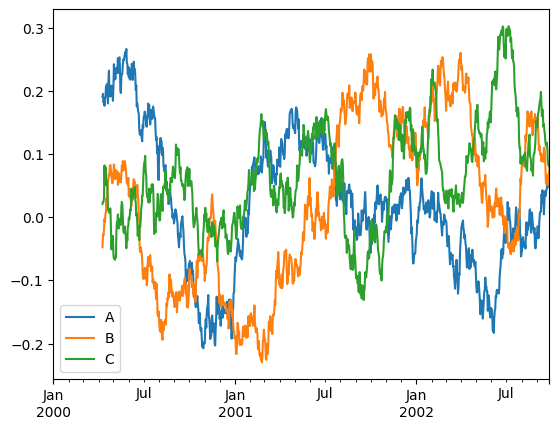

In [9]:
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))
tsdf.rolling(window=100).mean().plot()

<Axes: >

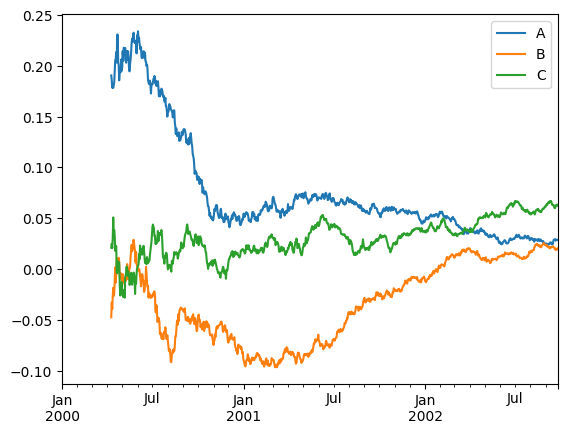

In [10]:
tsdf.expanding(min_periods=100).mean().plot()

<Axes: >

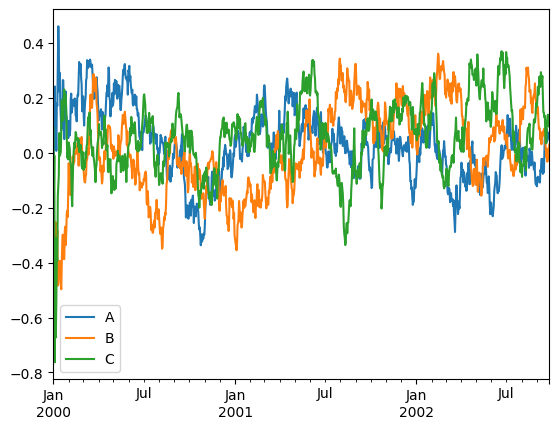

In [11]:
tsdf.ewm(span=60, min_periods=0, adjust=True).mean().plot()

<Axes: xlabel='A', ylabel='B'>

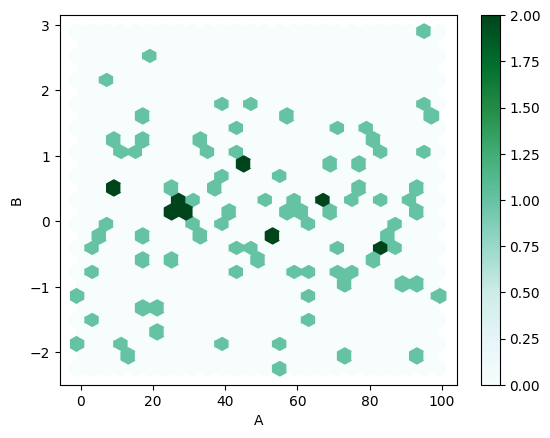

In [12]:
df = pd.DataFrame(np.random.randn(100, 2), columns=['A', 'B'])
df['A'] = df['A'] + np.arange(100)
df.plot.hexbin(x='A', y='B', gridsize=25)